<a href="https://colab.research.google.com/github/saiHemanth1096/DL_experiments/blob/main/DL_Exp_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text Classification

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
print(x_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [4]:
# Pad the sequences to have equal length
max_len = 500
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [5]:
# Set the input and output dimensions
input_dim = 10000
output_dim = 1
# Create the input layer
inputs = tf.keras.Input(shape=(None,), dtype="int32")

# Create the model
x = tf.keras.layers.Embedding(input_dim, 128)(inputs)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
outputs = tf.keras.layers.Dense(output_dim, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)

In [6]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])

In [7]:
# Train the model
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 121s 143ms/step - loss: 0.4865 - accuracy: 0.7638 - val_loss: 0.4343 - val_accuracy: 0.7934
Epoch 2/5
782/782 [==============================] - 102s 130ms/step - loss: 0.3400 - accuracy: 0.8539 - val_loss: 0.3791 - val_accuracy: 0.8533
Epoch 3/5
782/782 [==============================] - 75s 96ms/step - loss: 0.2357 - accuracy: 0.9070 - val_loss: 0.3017 - val_accuracy: 0.8781
Epoch 4/5
782/782 [==============================] - 73s 94ms/step - loss: 0.1729 - accuracy: 0.9366 - val_loss: 0.3260 - val_accuracy: 0.8714
Epoch 5/5
782/782 [==============================] - 72s 93ms/step - loss: 0.1363 - accuracy: 0.9512 - val_loss: 0.3256 - val_accuracy: 0.8728


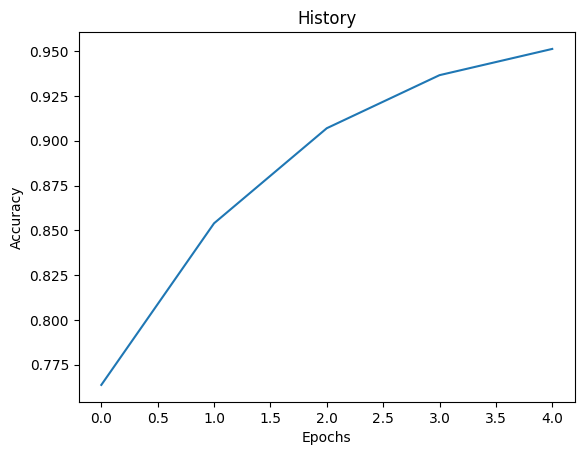

In [8]:
# Plot the accuracy
fig = plt.plot(history.history['accuracy'])
title = plt.title("History")
xlabel = plt.xlabel("Epochs")
ylabel = plt.ylabel("Accuracy")